## Imports

In [9]:
from google_play_scraper import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
import os
N = 5
pd.set_option('display.max_colwidth', None)

## Variables

In [16]:
main_folder = '/home/ics-home/sentiment_analysis/'
category_folders = ['apps_made_for_disabled/','browser/','entertainment/','music/','shopping/','social_media/']
folder_catergory_map = {'apps_made_for_disabled/':'Accessibility Apps',
                        'browser/':'Browser',
                        'entertainment/':'Entertainment',
                        'music/':'Music',
                        'shopping/':'Shopping',
                        'social_media/':'Social Media'
                       }
dfs = []

## Combine Reviews from all apps in a category to a single file

In [17]:
for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):  # Check if folder
        csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]  # Get CSV files in folder
        if csv_files:  # Check if any CSV files in folder
            df_merged = pd.concat([pd.read_csv(os.path.join(folder_path, f)) for f in csv_files])
            # Save merged data to new CSV file in folder
            #df_merged.to_csv(os.path.join(folder_path, f'{folder}_merged.csv'), index=False)
            df_merged.to_csv(os.path.join(folder_path, 'merged_reviews.csv'), index=False)

## Add Category Field to all the Merged Reviews

In [18]:
for folder in category_folders:
    folder_path = os.path.join(main_folder, folder)
    csv_file = os.path.join(folder_path,'merged_reviews.csv')
    if os.path.isfile(csv_file):
        df = pd.read_csv(csv_file)
        print(f"Working on: {folder}")
        df['category'] = folder_catergory_map[folder]
        df.to_csv(os.path.join(folder_path, 'merged_reviews.csv'), index=False)

Working on: apps_made_for_disabled/
Working on: browser/
Working on: entertainment/
Working on: music/
Working on: shopping/
Working on: social_media/


## Iterate through folders

In [19]:
for app_folder in os.listdir(main_folder):
    app_path = os.path.join(main_folder, app_folder)
    if os.path.isdir(app_path):
        csv_path = os.path.join(app_path, 'merged_reviews.csv')
        print(f"Working on: {csv_path}")
        if os.path.isfile(csv_path):
            df = pd.read_csv(csv_path)
            dfs.append(df)

Working on: /home/ics-home/sentiment_analysis/apps_made_for_disabled/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/browser/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/entertainment/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/music/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/shopping/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis/social_media/merged_reviews.csv


## Merging and Calculating Percentage

In [20]:
merged_df = pd.concat(dfs)

grouped = merged_df.groupby(['category', 'sentiment']).size().unstack()

grouped['Positive_pct'] = grouped['positive'] / grouped.sum(axis=1)
grouped['Negative_pct'] = grouped['negative'] / grouped.sum(axis=1)

In [21]:
grouped

sentiment,negative,positive,Positive_pct,Negative_pct
category,,,,
Accessibility Apps,2430,2700,0.526316,0.473636
Browser,751,1072,0.588042,0.411825
Entertainment,2724,1722,0.387314,0.612632
Music,611,725,0.542665,0.457150
Shopping,888,1409,0.613409,0.386488
Social Media,1582,1308,0.452595,0.547319


In [12]:
grouped = grouped.reindex(columns=['positive', 'Positive_pct', 'negative','Negative_pct'])

## Create Plot

In [8]:
'''
ax = grouped[['Positive_pct', 'Negative_pct']].plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_title('Percentage of Positive and Negative Reviews by App Category')
ax.set_xlabel('App Category')
ax.set_ylabel('Percentage')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)
'''

"\nax = grouped[['Positive_pct', 'Negative_pct']].plot(kind='bar', stacked=True, figsize=(10, 6))\n\nax.set_title('Percentage of Positive and Negative Reviews by App Category')\nax.set_xlabel('App Category')\nax.set_ylabel('Percentage')\n\n# Rotate the x-axis labels for readability\nplt.xticks(rotation=45)\n"

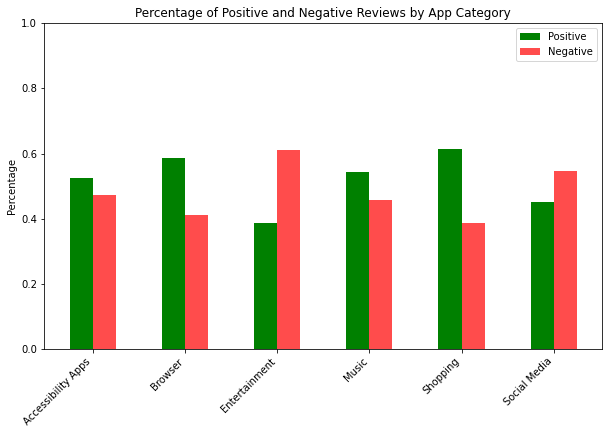

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(grouped.index))

# Plot the positive and negative bars for each category
ax.bar(x_pos, grouped['Positive_pct'], width=bar_width, align='center', color='green', label='Positive')
ax.bar(x_pos + bar_width, grouped['Negative_pct'], width=bar_width, align='center', color='red', label='Negative', alpha=0.7)

# Set the x-axis labels to the category names
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

# Set the y-axis limits and labels
ax.set_ylim(0, 1)
ax.set_ylabel('Percentage')

# Add a legend and title
ax.legend()
ax.set_title('Percentage of Positive and Negative Reviews by App Category')

plt.show()

In [22]:
main_folder2 = '/home/ics-home/sentiment_analysis_less_known/'
category_folders = ['apps_made_for_disabled/','browser/','entertainment/','music/','shopping/','social_media/']
folder_catergory_map = {'apps_made_for_disabled/':'Accessibility Apps',
                        'browser/':'Browser',
                        'entertainment/':'Entertainment',
                        'music/':'Music',
                        'shopping/':'Shopping',
                        'social_media/':'Social Media'
                       }
dfs2 = []

In [23]:
for folder in os.listdir(main_folder2):
    folder_path = os.path.join(main_folder2, folder)
    if os.path.isdir(folder_path):  # Check if folder
        csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]  # Get CSV files in folder
        if csv_files:  # Check if any CSV files in folder
            df_merged = pd.concat([pd.read_csv(os.path.join(folder_path, f)) for f in csv_files])
            # Save merged data to new CSV file in folder
            #df_merged.to_csv(os.path.join(folder_path, f'{folder}_merged.csv'), index=False)
            df_merged.to_csv(os.path.join(folder_path, 'merged_reviews.csv'), index=False)

In [24]:
for folder in category_folders:
    folder_path = os.path.join(main_folder2, folder)
    csv_file = os.path.join(folder_path,'merged_reviews.csv')
    if os.path.isfile(csv_file):
        df = pd.read_csv(csv_file)
        print(f"Working on: {folder}")
        df['category'] = folder_catergory_map[folder]
        df.to_csv(os.path.join(folder_path, 'merged_reviews.csv'), index=False)

Working on: apps_made_for_disabled/
Working on: browser/
Working on: entertainment/
Working on: music/
Working on: shopping/
Working on: social_media/


In [25]:
for app_folder in os.listdir(main_folder2):
    app_path = os.path.join(main_folder2, app_folder)
    if os.path.isdir(app_path):
        csv_path = os.path.join(app_path, 'merged_reviews.csv')
        print(f"Working on: {csv_path}")
        if os.path.isfile(csv_path):
            df = pd.read_csv(csv_path)
            dfs2.append(df)

Working on: /home/ics-home/sentiment_analysis_less_known/apps_made_for_disabled/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis_less_known/browser/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis_less_known/entertainment/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis_less_known/music/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis_less_known/shopping/merged_reviews.csv
Working on: /home/ics-home/sentiment_analysis_less_known/social_media/merged_reviews.csv


In [26]:
merged_df = pd.concat(dfs2)

grouped2 = merged_df.groupby(['category', 'sentiment']).size().unstack()

grouped2['Positive_pct'] = grouped2['positive'] / grouped2.sum(axis=1)
grouped2['Negative_pct'] = grouped2['negative'] / grouped2.sum(axis=1)

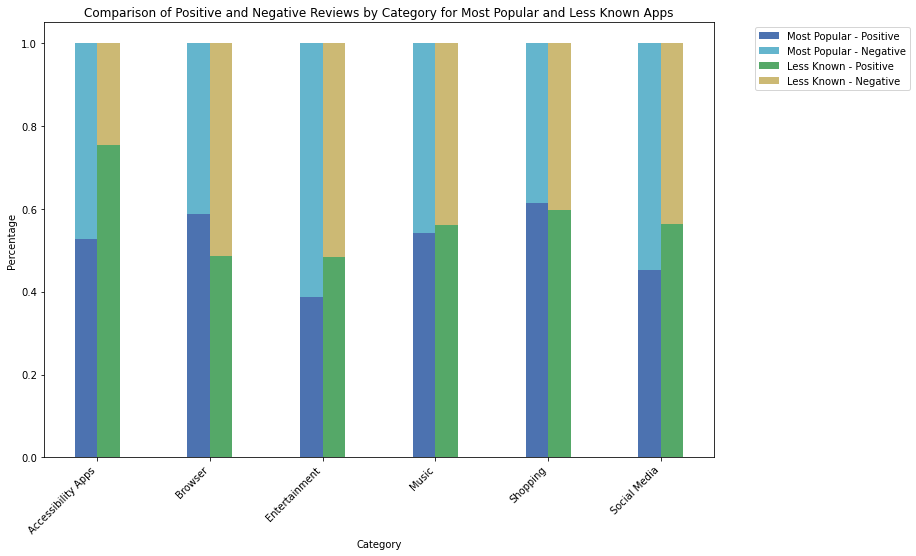

In [57]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['#4C72B0', '#64B5CD', '#55A868', '#CCB974', '#8172B2', '#C44E52']

# Set up data for grouped bar chart
categories = grouped.index
bar_width = 0.2
x_pos1 = np.arange(len(categories))
x_pos2 = [x + bar_width for x in x_pos1]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(x_pos1, grouped['Positive_pct'], width=bar_width, color=colors[0], label='Most Popular - Positive')
plt.bar(x_pos1, grouped['Negative_pct'], width=bar_width, color=colors[1], bottom=grouped['Positive_pct'], label='Most Popular - Negative')
plt.bar(x_pos2, grouped2['Positive_pct'], width=bar_width, color=colors[2], label='Less Known - Positive')
plt.bar(x_pos2, grouped2['Negative_pct'], width=bar_width, color=colors[3], bottom=grouped2['Positive_pct'], label='Less Known - Negative')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(x_pos1 + bar_width/2, categories)
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

plt.title('Comparison of Positive and Negative Reviews by Category for Most Popular and Less Known Apps')

# Add legend
#plt.legend(loc='upper left')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
# Show plot
plt.show()


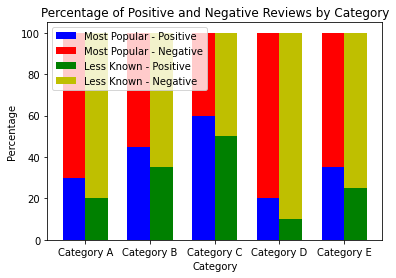

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample dataframes
most_popular_apps = pd.DataFrame({'Category': ['Category A', 'Category B', 'Category C', 'Category D', 'Category E'],
                                   'Positive': [30, 45, 60, 20, 35],
                                   'Negative': [70, 55, 40, 80, 65]})

less_known_apps = pd.DataFrame({'Category': ['Category A', 'Category B', 'Category C', 'Category D', 'Category E'],
                                   'Positive': [20, 35, 50, 10, 25],
                                   'Negative': [80, 65, 50, 90, 75]})

# Set up data for grouped bar chart
categories = most_popular_apps['Category']
bar_width = 0.35
x_pos1 = np.arange(len(categories))
x_pos2 = [x + bar_width for x in x_pos1]

# Create plot
fig, ax = plt.subplots()
plt.bar(x_pos1, most_popular_apps['Positive'], width=bar_width, color='b', label='Most Popular - Positive')
plt.bar(x_pos1, most_popular_apps['Negative'], width=bar_width, color='r', bottom=most_popular_apps['Positive'], label='Most Popular - Negative')
plt.bar(x_pos2, less_known_apps['Positive'], width=bar_width, color='g', label='Less Known - Positive')
plt.bar(x_pos2, less_known_apps['Negative'], width=bar_width, color='y', bottom=less_known_apps['Positive'], label='Less Known - Negative')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(x_pos1 + bar_width/2, categories)
plt.title('Percentage of Positive and Negative Reviews by Category')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()


In [39]:
grouped['positive']

category
Accessibility Apps    2700
Browser               1072
Entertainment         1722
Music                  725
Shopping              1409
Social Media          1308
Name: positive, dtype: int64

In [42]:
grouped

sentiment,negative,positive,Positive_pct,Negative_pct
category,,,,
Accessibility Apps,2430,2700,0.526316,0.473636
Browser,751,1072,0.588042,0.411825
Entertainment,2724,1722,0.387314,0.612632
Music,611,725,0.542665,0.457150
Shopping,888,1409,0.613409,0.386488
Social Media,1582,1308,0.452595,0.547319


In [45]:
grouped2

sentiment,negative,positive,Positive_pct,Negative_pct
category,,,,
Accessibility Apps,174,532,0.753541,0.246196
Browser,915,867,0.486532,0.513328
Entertainment,4413,4119,0.482771,0.517200
Music,722,926,0.561893,0.437957
Shopping,252,374,0.597444,0.402172
Social Media,172,223,0.564557,0.434822
